In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x,y

(      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 0               842     0          2.2         0   1       0           7   
 1              1021     1          0.5         1   0       1          53   
 2               563     1          0.5         1   2       1          41   
 3               615     1          2.5         0   0       0          10   
 4              1821     1          1.2         0  13       1          44   
 ...             ...   ...          ...       ...  ..     ...         ...   
 1995            794     1          0.5         1   0       1           2   
 1996           1965     1          2.6         1   0       0          39   
 1997           1911     0          0.9         1   1       1          36   
 1998           1512     0          0.9         0   4       1          46   
 1999            510     1          2.0         1   5       1          45   
 
       m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
print(x)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier()
sv=svm.SVC()
nb=GaussianNB()
rf=RandomForestClassifier()
lst=[knn,sv,nb]

888888888888888888888888888888888888888888888
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       151
           1       0.39      0.47      0.42       146
           2       0.38      0.42      0.40       148
           3       0.74      0.46      0.57       155

    accuracy                           0.52       600
   macro avg       0.54      0.52      0.52       600
weighted avg       0.55      0.52      0.52       600

******************************************
888888888888888888888888888888888888888888888
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.78      0.84      0.81       146
           2       0.84      0.82      0.83       148
           3       0.95      0.92      0.93       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       

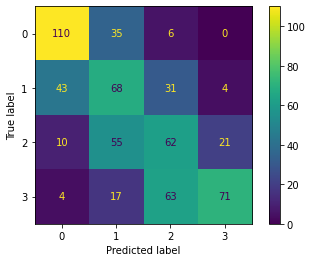

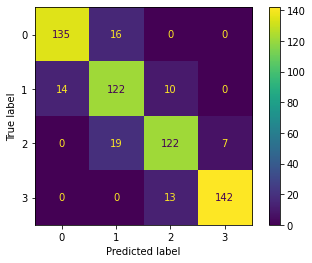

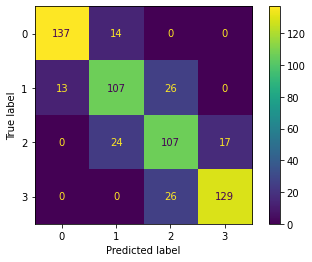

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("888888888888888888888888888888888888888888888")
  print(classification_report(y_test,y_pred))
  print("******************************************")
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))